Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Loading the dataset

In [5]:
df = pd.read_excel("datasets/dataset.xlsx")  
df.shape

(1100, 8)

Description of columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1100 non-null   object 
 1   Square Footage       1100 non-null   int64  
 2   Number of Occupants  1100 non-null   int64  
 3   Appliances Used      1100 non-null   int64  
 4   Average Temperature  1100 non-null   float64
 5   Day of Week          1100 non-null   object 
 6   Energy Consumption   1100 non-null   float64
 7   Heat Levels          1100 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 68.9+ KB


In [9]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,27672.654545,49.494545,25.829091,22.616845,3995.782200
std,13045.155166,28.721482,14.326171,7.150005,1144.547219
min,1161.000000,1.000000,1.000000,10.010000,2006.990000
25%,16651.750000,25.000000,14.000000,16.530000,3014.162500
50%,27914.500000,48.500000,26.000000,22.790000,4002.155000
75%,38881.000000,74.250000,38.000000,28.520000,4962.480000
max,49995.000000,100.000000,50.000000,34.980000,6042.560000


Checking for any null values

In [9]:
df.isnull()
df.isnull().sum()

Building Type           0
Square Footage          0
Number of Occupants     0
Appliances Used         0
 Average Temperature    0
Day of Week             0
Energy Consumption      0
Heat Levels             0
dtype: int64

Skewness

In [11]:
df.select_dtypes(include='number').skew()

Square Footage        -0.020469
Number of Occupants    0.064050
Appliances Used       -0.058470
Average Temperature   -0.034786
Energy Consumption     0.009385
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

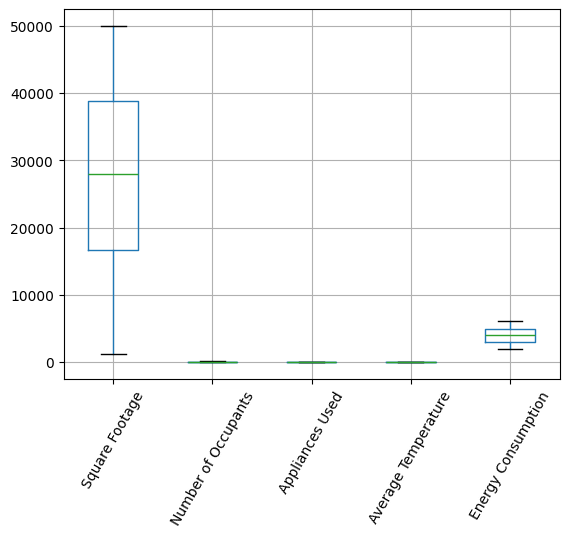

In [12]:
# checking for outliers using boxplot
df.boxplot(rot=60)
plt.show

One hot Encoding (Converrting Categorical data to Numerical data)

In [19]:
# Perform One-Hot Encoding for multiple categorical columns
categorical_columns = ['Building Type', 'Day of Week', 'Heat Levels']
df_encoded = pd.get_dummies(df, columns=categorical_columns, prefix=['BuildingType', 'DayOfWeek', 'HeatLevel'])

# Convert only the newly created one-hot encoded columns to integers
for col in df_encoded.columns:
    if any(prefix in col for prefix in ['BuildingType_', 'DayOfWeek_', 'HeatLevel_']):  # Ensuring only relevant columns
        df_encoded[col] = df_encoded[col].astype(int)

# Save to a new Excel file
output_path = "cleaned.xlsx"
df_encoded.to_excel(output_path, index=False)

Standardization (Method - I)

In [24]:
file_path = "cleaned.xlsx"  # Update with your actual file path
df = pd.read_excel(file_path)

# Columns to standardize
columns_to_standardize = ["Square Footage", "Number of Occupants", "Appliances Used", 
                          "Average Temperature", "Energy Consumption"]

# Apply Z-score normalization
df[columns_to_standardize] = (df[columns_to_standardize] - df[columns_to_standardize].mean()) / df[columns_to_standardize].std()

# Save the standardized dataset
output_path = "standardized_dataset_check.xlsx"
df.to_excel(output_path, index=False)

Standarization (Method - II)

In [ ]:
file_path = "cleaned.xlsx"  # Ensure this is the correct path
df = pd.read_excel(file_path)

# Columns to standardize
columns_to_standardize = ["Square Footage", "Number of Occupants", "Appliances Used", 
                          "Average Temperature", "Energy Consumption"]

# Print original mean and standard deviation
print("Before Standardization:")
for col in columns_to_standardize:
    print(f"{col} - Mean: {df[col].mean():.4f}, Std Dev: {df[col].std():.4f}")

# Apply Z-score normalization
df[columns_to_standardize] = df[columns_to_standardize].apply(lambda x: (x - x.mean()) / x.std())

# Print new mean and standard deviation
print("/nAfter Standardization:")
for col in columns_to_standardize:
    print(f"{col} - Mean: {df[col].mean():.4f}, Std Dev: {df[col].std():.4f}")

# Save the standardized dataset
output_path = "standardized_dataset.xlsx"
df.to_excel(output_path, index=False)

Before Standardization:
Square Footage - Mean: 27672.6545, Std Dev: 13045.1552
Number of Occupants - Mean: 49.4945, Std Dev: 28.7215
Appliances Used - Mean: 25.8291, Std Dev: 14.3262
Average Temperature - Mean: 22.6168, Std Dev: 7.1500
Energy Consumption - Mean: 3995.7822, Std Dev: 1144.5472

After Standardization:
Square Footage - Mean: 0.0000, Std Dev: 1.0000
Number of Occupants - Mean: 0.0000, Std Dev: 1.0000
Appliances Used - Mean: 0.0000, Std Dev: 1.0000
Average Temperature - Mean: -0.0000, Std Dev: 1.0000
Energy Consumption - Mean: -0.0000, Std Dev: 1.0000


Model Training

In [2]:
import joblib
import pandas as pd

# Load dataset
file_path = "F:/PROJECTS/Sem - 8/ML/P1/datasets/standardized_dataset.xlsx"  # Ensure this is the correct path
df = pd.read_excel(file_path)

# Define independent variables (X) and dependent variable (y)
X = df.drop(columns=["Energy Consumption", "Average Temperature"])  # Features
y = df["Energy Consumption"]  # Target variable

# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Save the trained model for future predictions
model_filename = "mlr_energy_consumption_model.pkl"
joblib.dump(model, model_filename)

print(f"\nModel saved as '{model_filename}' for future predictions.")



Model Performance:
Mean Absolute Error (MAE): 0.3282
Mean Squared Error (MSE): 0.1587
Root Mean Squared Error (RMSE): 0.3984
R-squared (R²): 0.8414

Model saved as 'mlr_energy_consumption_model.pkl' for future predictions.


Checking if the model got saved or not

In [3]:
import pickle
from sklearn.linear_model import LinearRegression  # Or your model type

# Train your model (Replace with actual code)
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
with open("mlr_energy_consumption_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ Model saved successfully!")

✅ Model saved successfully!


Again checking if the model got saved or not

In [4]:
import pickle

with open("mlr_energy_consumption_model.pkl", "rb") as file:
    model = pickle.load(file)

print(f"✅ Model Loaded Successfully! Type: {type(model)}")

✅ Model Loaded Successfully! Type: <class 'sklearn.linear_model._base.LinearRegression'>


Plotting for Multiple Linear Regression

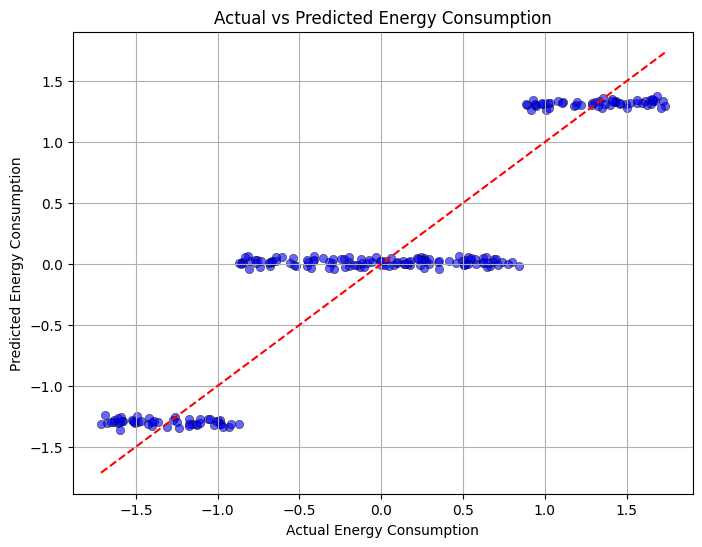

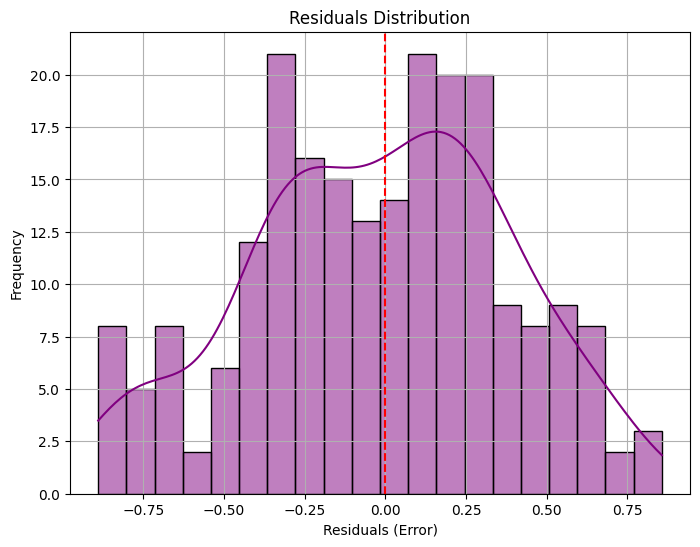

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions
y_pred = model.predict(X_test)

#*Actual vs. Predicted Plot**
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6, edgecolor="black")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  # Perfect Prediction Line
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.grid(True)
plt.show()

# Residual Plot**
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color="purple")
plt.axvline(x=0, color="red", linestyle="dashed")  # Mean Residual Line
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.grid(True)
plt.show()

Checking with Random Forest Algorithm

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

evaluate_model(y_test, rf_pred, "Random Forest")


Random Forest Performance:
MAE: 0.3286
MSE: 0.1703
RMSE: 0.4126
R² Score: 0.8299
